# ShellHacks - Plant Classification

In [210]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import seaborn as sns

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle


from time import time
from mpl_toolkits.mplot3d import Axes3D

import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator,array_to_img
from keras.utils.vis_utils import plot_model
from tensorflow.keras.layers import experimental


In [1]:
train_dir = 'Dataset/train'
test_dir = 'Dataset/test'

In [16]:
diseases = os.listdir(train_dir)
diseases

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

In [17]:
len(diseases)

33

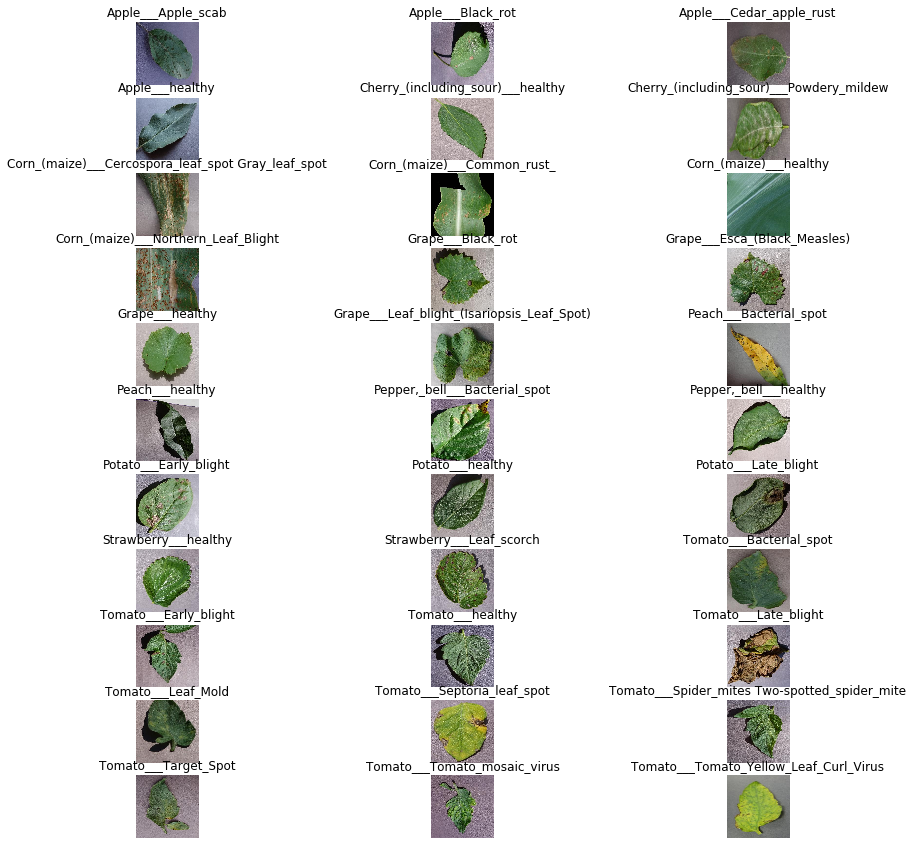

In [11]:
plt.figure(figsize = (15,15))
for i, col in enumerate(os.listdir(train_dir)):
        image = random.choice(os.listdir(train_dir + '/' + col))
        image_path = train_dir + '/' + col + '/' + image
        img = cv2.imread(image_path)
        plt.subplot(11,3,i+1)
        plt.title(col)
        plt.imshow(img[:,:,::-1])
        plt.axis(False)
        i = i + 1

In [27]:
plants = []
num_diseases = 0
num_healthy = 0

for i in diseases:
    if i.split('___')[0] not in plants:
        plants.append(i.split('___')[0])
    if i.split('___')[1] == 'healthy':
        num_healthy += 1
    elif i.split('___')[1] != 'healthy':
        num_diseases += 1

final_plants_name = []
for j in plants:
    if j.split('_')[0] not in final_plants_name:
        final_plants_name.append(j.split('_')[0])

In [28]:
plants

['Apple',
 'Cherry_(including_sour)',
 'Corn_(maize)',
 'Grape',
 'Peach',
 'Pepper,_bell',
 'Potato',
 'Strawberry',
 'Tomato']

In [29]:
final_plants_name

['Apple',
 'Cherry',
 'Corn',
 'Grape',
 'Peach',
 'Pepper,',
 'Potato',
 'Strawberry',
 'Tomato']

In [30]:
num_healthy

9

In [31]:
num_diseases

24

In [36]:
total_num

{'Apple___Apple_scab': 2017,
 'Apple___Black_rot': 1988,
 'Apple___Cedar_apple_rust': 880,
 'Apple___healthy': 5264,
 'Cherry_(including_sour)___healthy': 2736,
 'Cherry_(including_sour)___Powdery_mildew': 3368,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1644,
 'Corn_(maize)___Common_rust_': 3816,
 'Corn_(maize)___healthy': 3720,
 'Corn_(maize)___Northern_Leaf_Blight': 3152,
 'Grape___Black_rot': 3776,
 'Grape___Esca_(Black_Measles)': 4428,
 'Grape___healthy': 1356,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 3444,
 'Peach___Bacterial_spot': 7352,
 'Peach___healthy': 1152,
 'Pepper,_bell___Bacterial_spot': 3193,
 'Pepper,_bell___healthy': 4725,
 'Potato___Early_blight': 3200,
 'Potato___healthy': 488,
 'Potato___Late_blight': 3200,
 'Strawberry___healthy': 1460,
 'Strawberry___Leaf_scorch': 3552,
 'Tomato___Bacterial_spot': 6808,
 'Tomato___Early_blight': 3200,
 'Tomato___healthy': 5089,
 'Tomato___Late_blight': 6109,
 'Tomato___Leaf_Mold': 3048,
 'Tomato___Septoria_leaf

In [41]:
total_num = {}
for i in diseases:
    total_num[i] = len(os.listdir(train_dir + '/' + i))

Num_images = pd.DataFrame(total_num.values(), index=total_num.keys(), columns=["Total Images"])
Num_images

,Total Images
Apple___Apple_scab,2017
Apple___Black_rot,1988
Apple___Cedar_apple_rust,880
Apple___healthy,5264
Cherry_(including_sour)___healthy,2736
Cherry_(including_sour)___Powdery_mildew,3368
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,1644
Corn_(maize)___Common_rust_,3816
Corn_(maize)___healthy,3720
Corn_(maize)___Northern_Leaf_Blight,3152


<Figure size 3600x360 with 0 Axes>

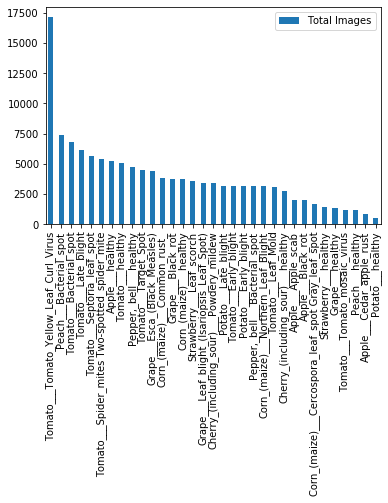

In [63]:
plt.figure(figsize=(50,5))
Num_images.sort_values(by=['Total Images'],  ascending=False).plot(kind='bar')

Apple___Apple_scab                                     2017
Apple___Black_rot                                      1988
Apple___Cedar_apple_rust                                880
Apple___healthy                                        5264
Cherry_(including_sour)___healthy                      2736
Cherry_(including_sour)___Powdery_mildew               3368
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     1644
Corn_(maize)___Common_rust_                            3816
Corn_(maize)___healthy                                 3720
Corn_(maize)___Northern_Leaf_Blight                    3152
Grape___Black_rot                                      3776
Grape___Esca_(Black_Measles)                           4428
Grape___healthy                                        1356
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)             3444
Peach___Bacterial_spot                                 7352
Peach___healthy                                        1152
Pepper,_bell___Bacterial_spot           

33

In [83]:
total_img = 0
for i in range(len(Num_images)):
    total_img += Num_images['Total Images'][i]
    print(total_img)

2017
4005
4885
10149
12885
16253
17897
21713
25433
28585
32361
36789
38145
41589
48941
50093
53286
58011
61211
61699
64899
66359
69911
76719
79919
85008
91117
94165
99833
105197
109693
110889
128033


In [82]:
total_img

128033

---

In [85]:
img_height = 224
img_width = 224
batch_size = 100

In [89]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=69,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 128028 files belonging to 33 classes.


In [91]:
testing_set =  tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=69,
    image_size= (img_height, img_width),
    batch_size=batch_size
)

Found 31956 files belonging to 33 classes.


In [172]:
train_data = ImageDataGenerator(shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_data.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset='training') # set as training data

validation_generator = train_data.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode="sparse",
    subset='validation') # set as validation data

Found 102436 images belonging to 33 classes.
Found 25592 images belonging to 33 classes.


In [173]:
classes = train_generator.class_indices

In [176]:
CNN = tf.keras.models.Sequential([
  experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(len(classes), activation= 'softmax')
])

In [177]:
CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [178]:
CNN.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 52, 52, 128)      

In [179]:
Model1 = CNN.fit(train_generator, validation_data= validation_generator ,epochs = 3)

Epoch 1/3
1025/1025 [==============================] - 1389s 1s/step - loss: 0.8979 - accuracy: 0.7361 - val_loss: 0.3911 - val_accuracy: 0.8792
Epoch 2/3
1025/1025 [==============================] - 1265s 1s/step - loss: 0.2999 - accuracy: 0.9015 - val_loss: 0.2952 - val_accuracy: 0.9032
Epoch 3/3
1025/1025 [==============================] - 1257s 1s/step - loss: 0.1994 - accuracy: 0.9330 - val_loss: 0.2504 - val_accuracy: 0.9215


In [260]:
CNN.save('CNN_model.h5')

In [181]:
Model1.history

{'loss': [0.8979426026344299, 0.2998755872249603, 0.199388787150383],
 'accuracy': [0.7360888719558716, 0.9014701843261719, 0.9329532384872437],
 'val_loss': [0.39114463329315186, 0.29519957304000854, 0.2503807544708252],
 'val_accuracy': [0.8791809678077698, 0.9031728506088257, 0.9214598536491394]}

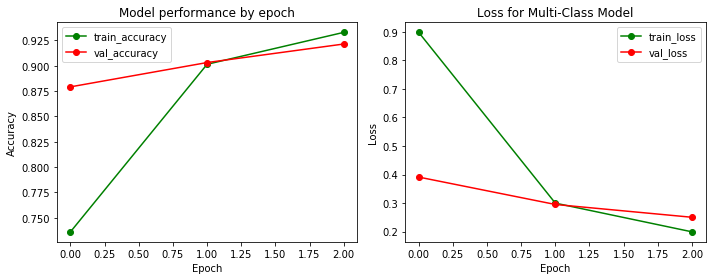

In [201]:
plt.subplots(1,2,figsize =(10,4))

# Let's plot the loss over the 10 epochs
plt.subplot(1,2,1)
plt.title('Model performance by epoch')
plt.plot(Model1.history['accuracy'],'go-')
plt.plot(Model1.history['val_accuracy'],'ro-')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Let's see the loss over 
plt.subplot(1,2,2)
plt.title('Loss for Multi-Class Model')
plt.plot(Model1.history['loss'],'go-')
plt.plot(Model1.history['val_loss'],'ro-')
plt.legend(['train_loss', 'val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

In [195]:
test_gen = ImageDataGenerator()

test_set = test_gen.flow_from_directory(test_dir,
                                        target_size = (img_width,img_height),
                                        batch_size = batch_size,
                                        class_mode="sparse",
                                        shuffle=False)

Found 31956 images belonging to 33 classes.


In [196]:
Model1.history['accuracy'][-1]

0.9329532384872437

In [197]:
Model1.history['val_accuracy'][-1]

0.9214598536491394

In [198]:
CNN.evaluate(test_set)

320/320 [==============================] - 51s 157ms/step - loss: 0.4538 - accuracy: 0.8690


[0.453832745552063, 0.8690387010574341]

In [227]:
predictions = CNN.predict(test_set)
trueClass=test_set.classes[test_set.index_array]

In [228]:
predictedClass = np.argmax(predictions, axis=1)

In [233]:
target_names = list(test_set.class_indices.keys())
target_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [240]:
conf_mat=confusion_matrix(y_true=trueClass, y_pred=predictedClass)

In [235]:
conf_mat

array([[ 424,   36,    4, ...,    0,    0,    0],
       [   0,  493,    0, ...,    0,    0,    0],
       [   0,    0,  213, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ..., 4132,    0,    0],
       [   0,    7,    0, ...,    0,  247,    0],
       [   0,    0,    0, ...,    0,    0, 1241]], dtype=int64)

In [241]:
test_set.class_indices.keys()

dict_keys(['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy'])

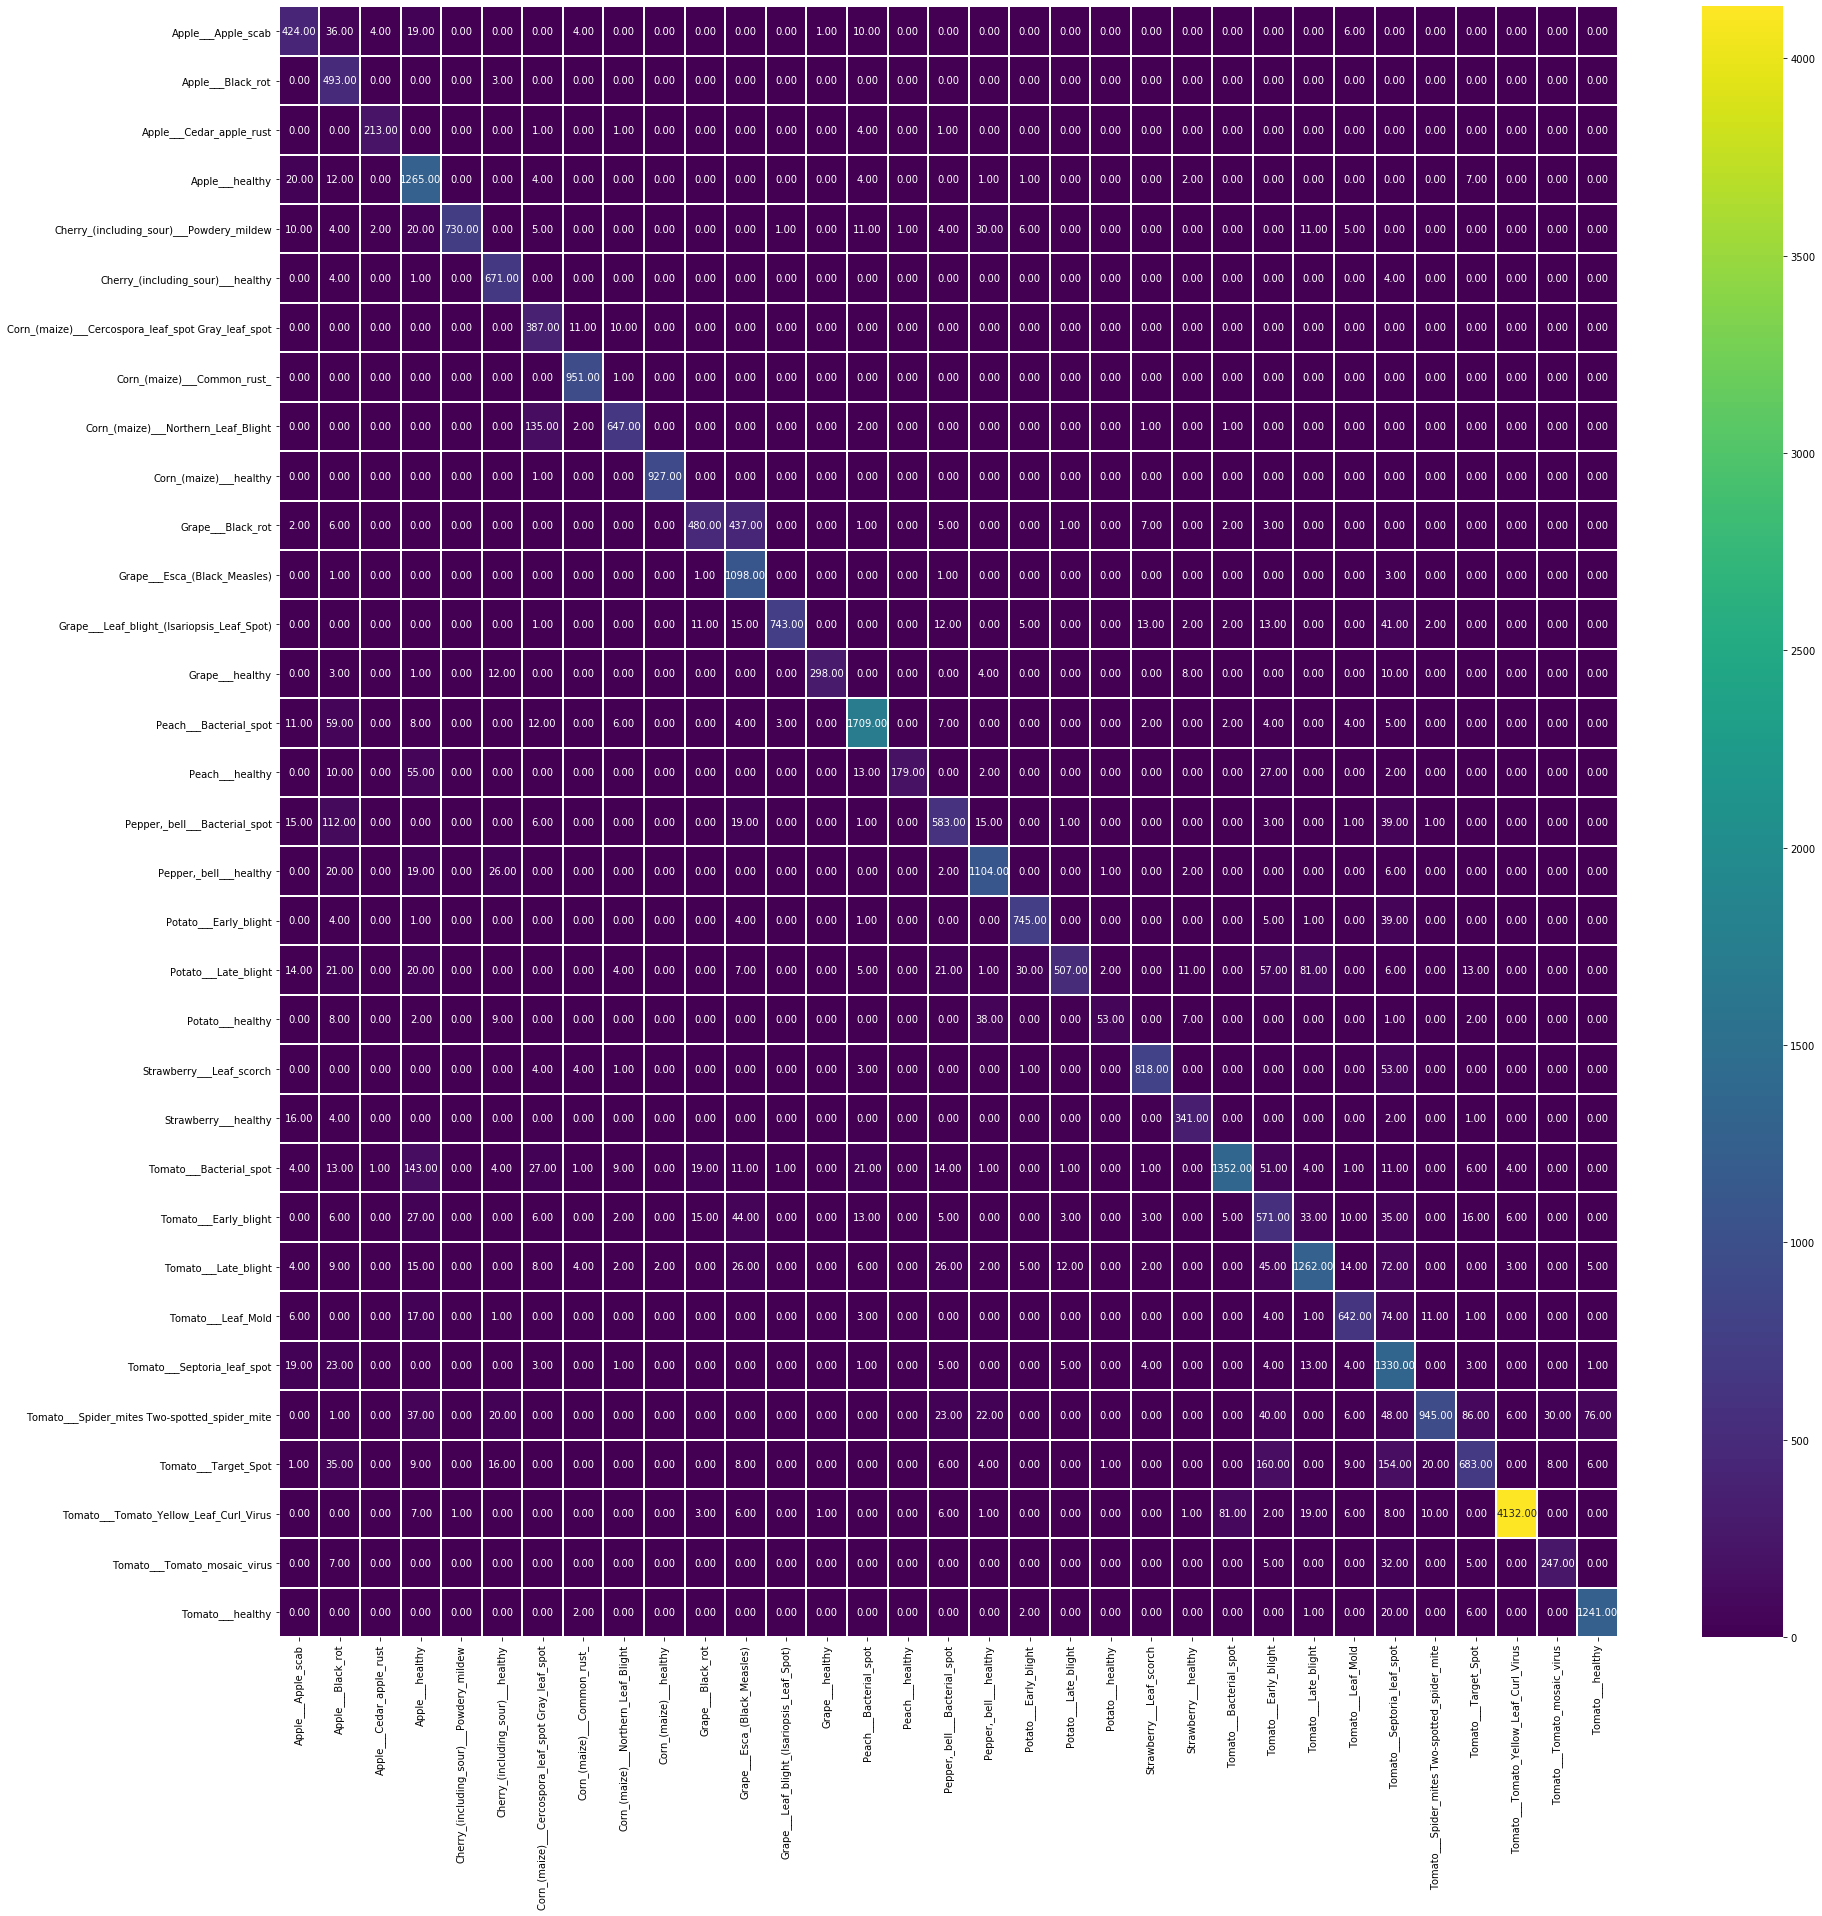

In [244]:
plt.subplots(figsize=(30,30))
sns.heatmap(conf_mat,
            annot=True,
            cbar=True,
            xticklabels=list(test_set.class_indices.keys()),
            yticklabels=list(test_set.class_indices.keys()),
            cmap="viridis",
            linewidths=1,
            fmt='.2f'
           )

In [245]:
print(classification_report(trueClass, predictedClass, target_names=target_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.78      0.84      0.81       504
                                 Apple___Black_rot       0.55      0.99      0.71       496
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       220
                                   Apple___healthy       0.76      0.96      0.85      1316
          Cherry_(including_sour)___Powdery_mildew       1.00      0.87      0.93       840
                 Cherry_(including_sour)___healthy       0.88      0.99      0.93       680
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.65      0.95      0.77       408
                       Corn_(maize)___Common_rust_       0.97      1.00      0.98       952
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.82      0.88       788
                            Corn_(maize)___healthy       1.00      1.00      1.

<Figure size 432x288 with 0 Axes>

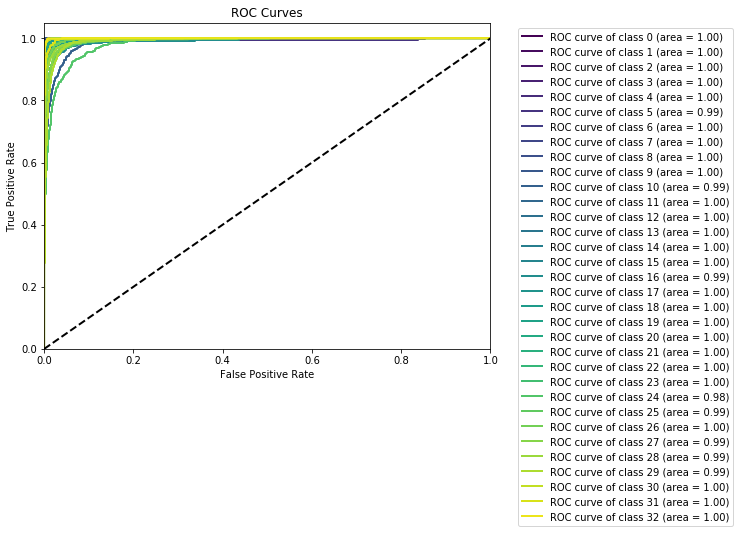

In [259]:
# Generatring the ROC curve using the Scikitplot's plot_roc method
import scikitplot as skplt

plt.figure()
skplt.metrics.plot_roc(y_true=trueClass,
                       y_probas=predictions,
                       title='ROC Curves',
                       plot_micro=False,
                       plot_macro=False,
                       classes_to_plot=None,
                       figsize=(8, 6),
                       cmap='viridis')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()